# Problem Statement

AeroFit, a leading fitness equipment brand, seeks to better understand the characteristics of its target customers for different treadmill models. Currently, the company lacks insights into how customer demographics and purchase patterns vary across products, limiting its ability to provide tailored recommendations to new customers. To address this, AeroFit aims to perform descriptive analytics to create customer profiles, and use contingency tables with conditional and marginal probabilities to identify differences across treadmill types, enabling improved product positioning and customer targeting.

# Basic Metrics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('aerofit_treadmill.csv')
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [67]:
# Add a 'Price' column based on the 'Product' column
def get_price(product):
    if product == 'KP281':
        return 1500
    elif product == 'KP481':
        return 1750
    elif product == 'KP781':
        return 2500
    else:
        return None

data['Price'] = data['Product'].apply(get_price)

data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Price
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500
176,KP781,42,Male,18,Single,5,4,89641,200,2500
177,KP781,45,Male,16,Single,5,5,90886,160,2500
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500


In [66]:
#First five rows of the data
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Price
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500


In [68]:
#shape of the data
data.shape

(180, 10)

In [69]:
#columns in the data
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Price'],
      dtype='object')

In [70]:
#data type of each column
data.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64
Price,int64


# Missing value and Outlier Detection

In [71]:
#Missing Values
data.isna()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Price
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False,False


In [72]:
data.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0
Price,0


In [73]:
# statistical summary
data.describe()

,Age,Education,Usage,Fitness,Income,Miles,Price
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,1805.555556
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,387.978895
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,1500.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,1500.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,1750.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,1750.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,2500.000000


In [ ]:
#Using boxplots in visual analysis outliers are detected below

# Non-graphical Analysis

## value_counts

In [74]:
#value_counts
data.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles  Price
KP281    18   Male    14         Single         3      4        29562   112    1500     1
         19   Female  14         Partnered      4      3        30699   66     1500     1
              Male    12         Single         3      3        32973   85     1500     1
                      15         Single         2      3        31836   75     1500     1
         20   Female  14         Partnered      3      3        32973   66     1500     1
                                                                                       ..
KP781    40   Male    21         Single         6      5        83416   200    2500     1
         42   Male    18         Single         5      4        89641   200    2500     1
         45   Male    16         Single         5      5        90886   160    2500     1
         47   Male    18         Partnered      4      5        104581  120    2500     1
         48   Male    18         Partnered      4      5        95508   180    2500     1
Name: count, Length: 180, dtype: int64

In [75]:
data['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [76]:
data['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [77]:
data['Age'].value_counts()

,count
Age,
25,25
23,18
24,12
26,12
28,9
33,8
35,8
22,7
30,7


In [15]:
data['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [16]:
data['Education'].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


In [17]:
data['Usage'].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [18]:
data['Fitness'].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


## unique attributes

In [78]:
data.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37
Price,3


In [20]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:

data['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [22]:
data['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

# Visual Analysis

## Univariate

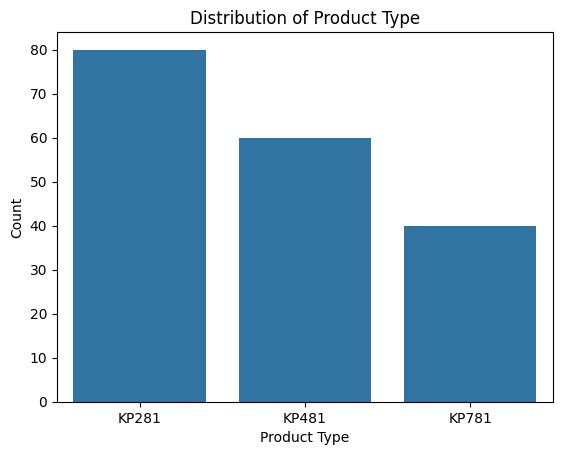

In [24]:
#Distribution of product type
plt.figure()
sns.countplot(x='Product',data=data)
plt.title('Distribution of Product Type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

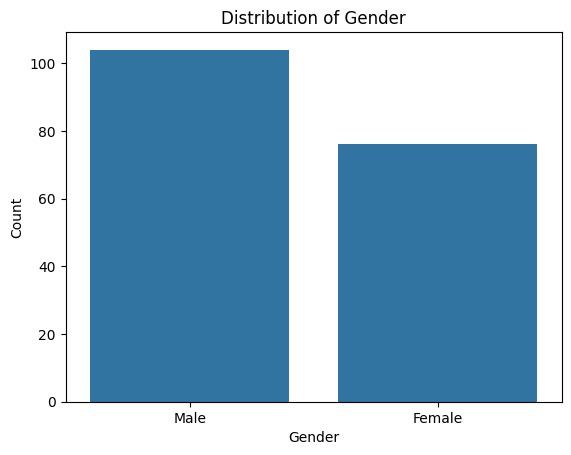

In [25]:
#Distribution of gender
plt.figure()
sns.countplot(x='Gender',data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

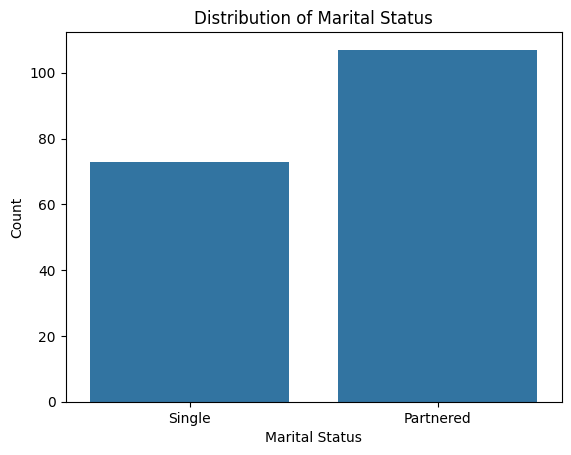

In [26]:
#Distribution of marital status
plt.figure()
sns.countplot(x='MaritalStatus',data=data)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

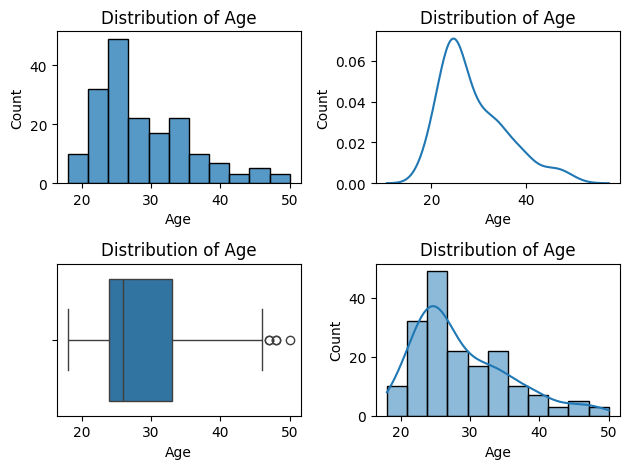

In [27]:
#Different plots for distribution of age
plt.subplot(2,2,1)
sns.histplot(x='Age',data=data)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(2,2,2)
sns.kdeplot(x='Age',data=data)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(2,2,3)
sns.boxplot(x='Age',data=data)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel(' ')

plt.subplot(2,2,4)
sns.histplot(x='Age',data=data,kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

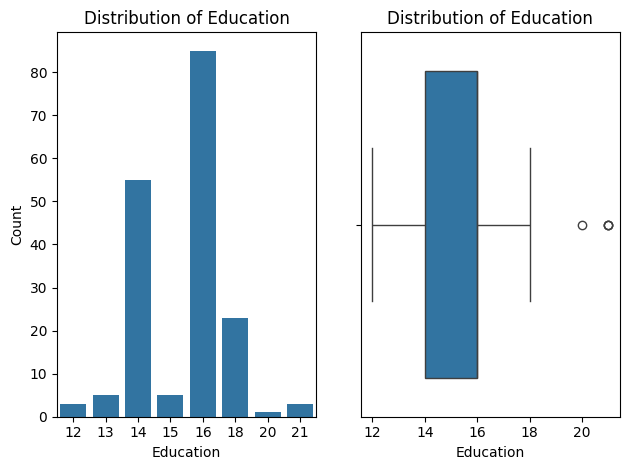

In [28]:
#Distribution of Education in years
plt.subplot(1,2,1)
sns.countplot(x='Education',data=data)
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.boxplot(x='Education',data=data)
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel(' ')

plt.tight_layout()
plt.show()

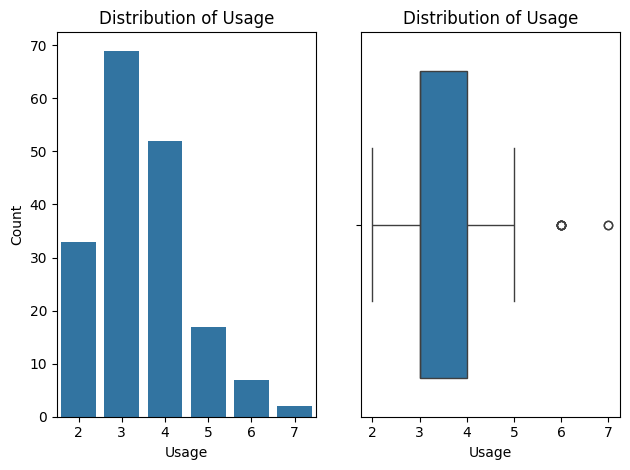

In [29]:
#Usage of treadmill per week
plt.subplot(1,2,1)
sns.countplot(x='Usage',data=data)
plt.title('Distribution of Usage')
plt.xlabel('Usage')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.boxplot(x='Usage',data=data)
plt.title('Distribution of Usage')
plt.xlabel('Usage')
plt.ylabel(' ')

plt.tight_layout()
plt.show()


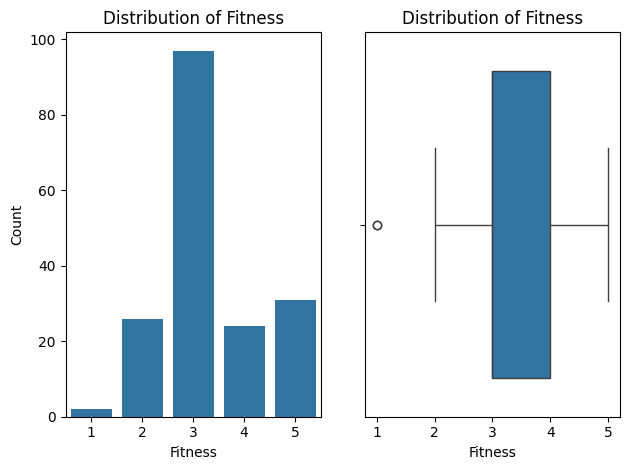

In [30]:
#self rated fitness
plt.subplot(1,2,1)
sns.countplot(x='Fitness',data=data)
plt.title('Distribution of Fitness')
plt.xlabel('Fitness')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.boxplot(x='Fitness',data=data)
plt.title('Distribution of Fitness')
plt.xlabel('Fitness')
plt.ylabel(' ')

plt.tight_layout()
plt.show()

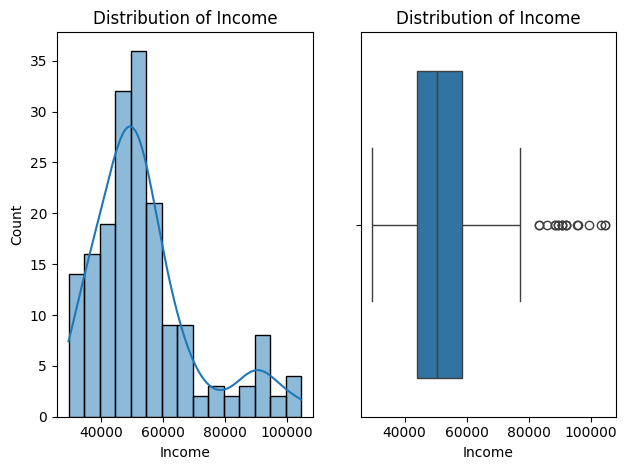

In [31]:
#Annual income (in $)
plt.subplot(1,2,1)
sns.histplot(x='Income',data=data,kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.boxplot(x='Income',data=data)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel(' ')

plt.tight_layout()
plt.show()

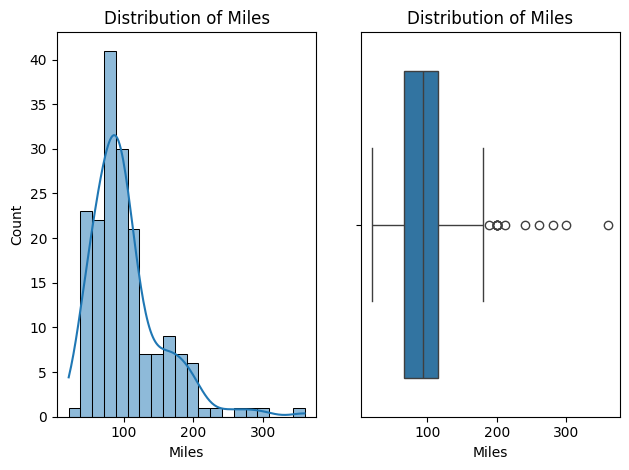

In [32]:
#The average number of miles the customer expects to walk/run each week
plt.subplot(1,2,1)
sns.histplot(x='Miles',data=data,kde=True)
plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.boxplot(x='Miles',data=data)
plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.ylabel(' ')

plt.tight_layout()
plt.show()

## Bivariate

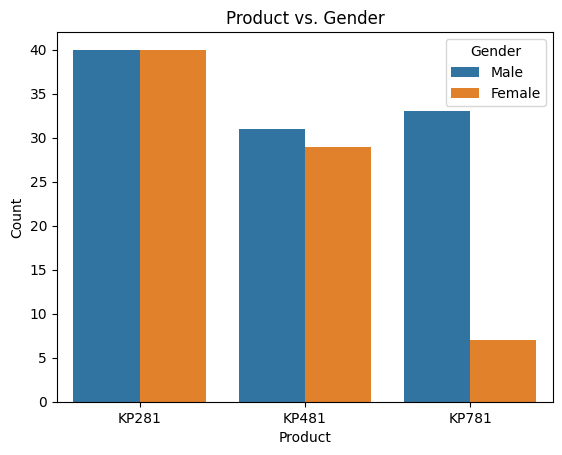

In [33]:
# Plot for Product and Gender
sns.countplot(x='Product', hue='Gender', data=data)
plt.title('Product vs. Gender')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

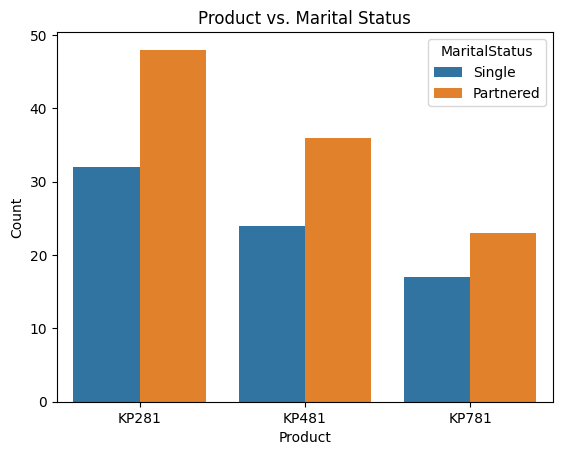

In [34]:
# Plot for Product and MaritalStatus
sns.countplot(x='Product', hue='MaritalStatus', data=data)
plt.title('Product vs. Marital Status')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

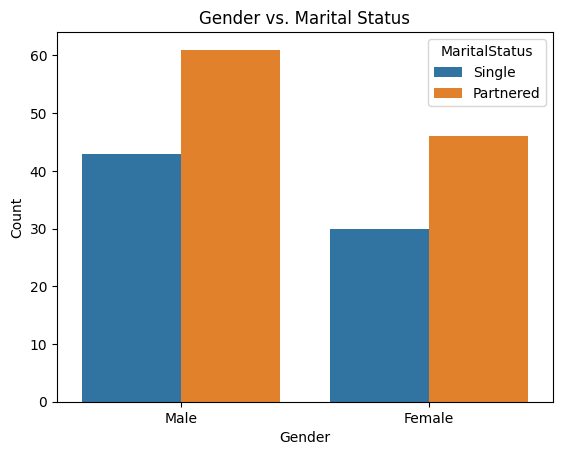

In [35]:
# Plot for Gender and MaritalStatus
sns.countplot(x='Gender', hue='MaritalStatus', data=data)
plt.title('Gender vs. Marital Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

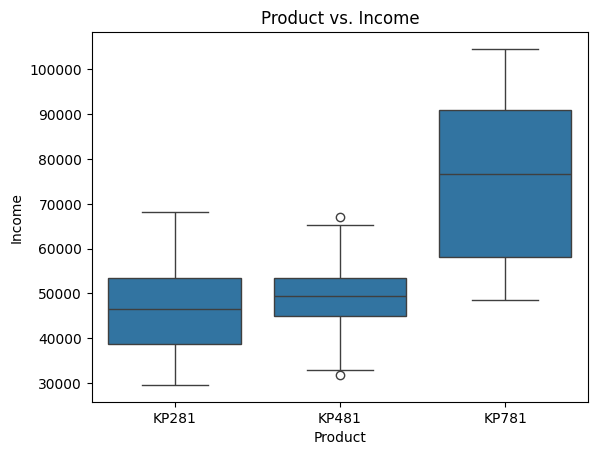

In [36]:
# Box plot for Product and Income
sns.boxplot(x='Product', y='Income', data=data)
plt.title('Product vs. Income')
plt.xlabel('Product')
plt.ylabel('Income')
plt.show()

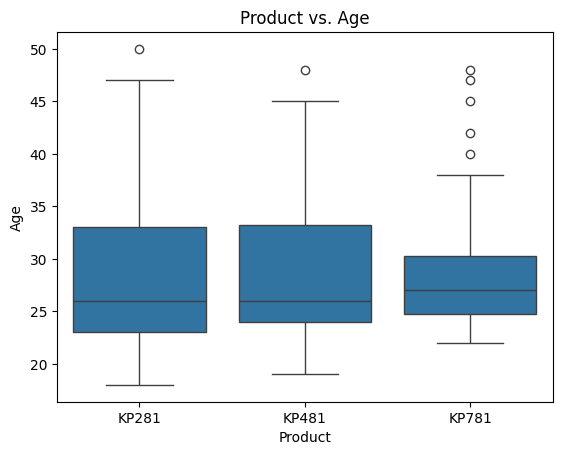

In [37]:
# Box plot for Product and Age
sns.boxplot(x='Product', y='Age', data=data)
plt.title('Product vs. Age')
plt.xlabel('Product')
plt.ylabel('Age')
plt.show()

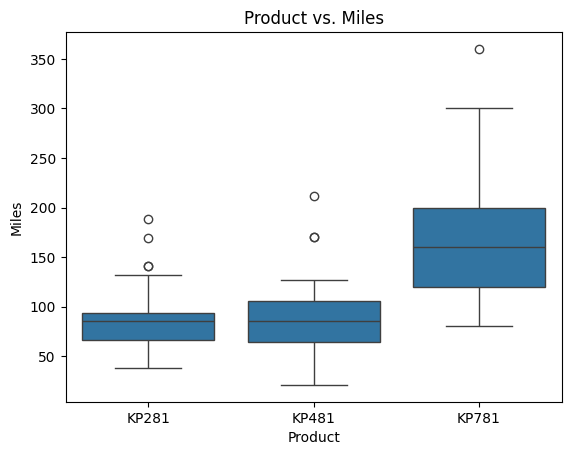

In [38]:
# Box plot for Product and Miles
sns.boxplot(x='Product', y='Miles', data=data)
plt.title('Product vs. Miles')
plt.xlabel('Product')
plt.ylabel('Miles')
plt.show()

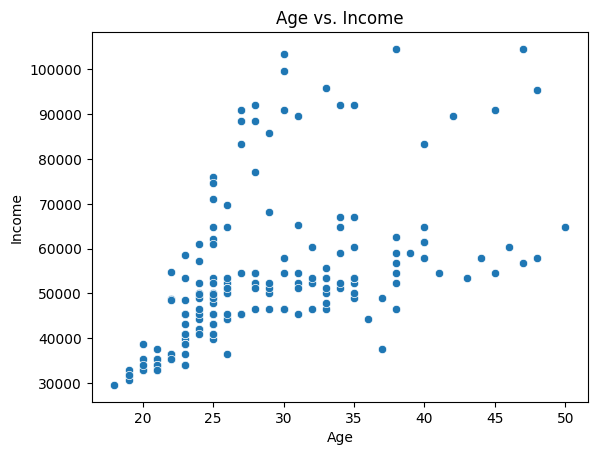

In [39]:
#scatterplot age vs income
plt.figure()
sns.scatterplot(x='Age', y='Income', data=data)
plt.title('Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

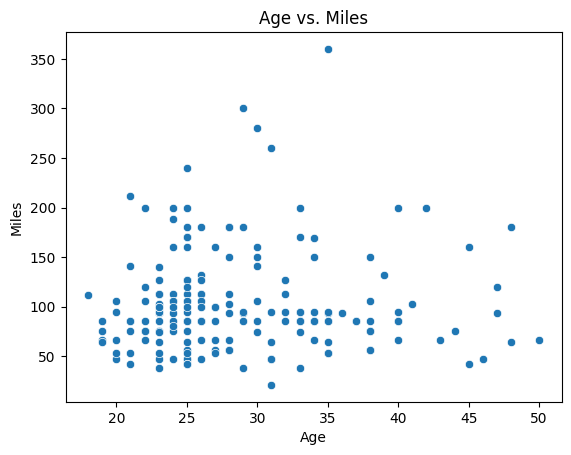

In [40]:
# scatterplot age vs miles
plt.figure()
sns.scatterplot(x='Age', y='Miles', data=data)
plt.title('Age vs. Miles')
plt.xlabel('Age')
plt.ylabel('Miles')
plt.show()

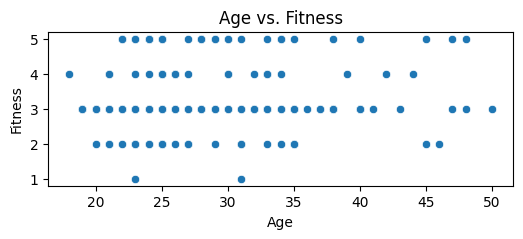

In [41]:
# scatter plot age vs Fitness
plt.figure(figsize=(6, 2))
sns.scatterplot(x='Age', y='Fitness', data=data)
plt.title('Age vs. Fitness')
plt.xlabel('Age')
plt.ylabel('Fitness')
plt.show()

## Multivariate

### Pairplot

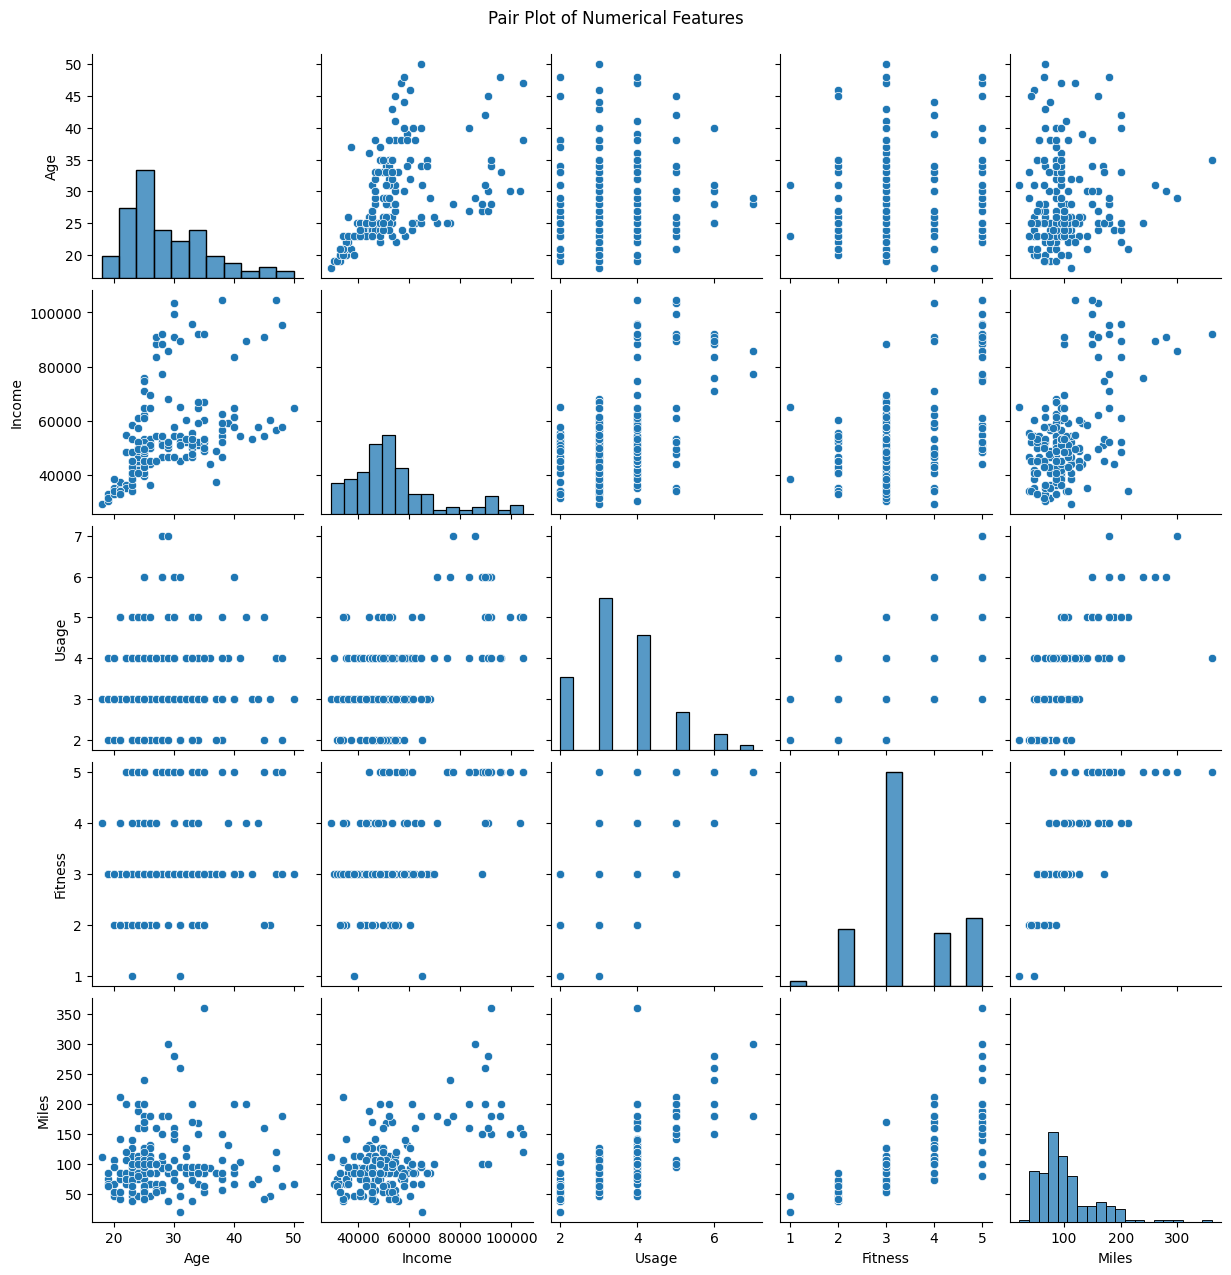

In [42]:
# Pairplot
sns.pairplot(data[['Age', 'Income', 'Usage', 'Fitness', 'Miles']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

### Heatmaps

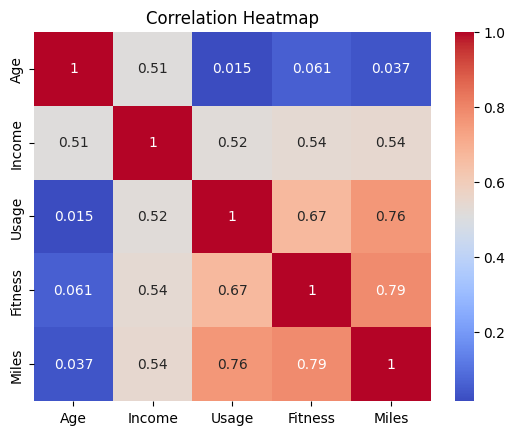

In [43]:
#Heatmaps
corr_matrix = data[['Age', 'Income', 'Usage', 'Fitness', 'Miles']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Descriptive Analytics

In [61]:
# Contingency table and probabilities for Product and Gender
gender_product_table = pd.crosstab(data['Product'], data['Gender'], margins=True)
print("Contingency Table: Product vs. Gender")
display(gender_product_table)

print("\nConditional Probabilities (given Product):")
display(gender_product_table.apply(lambda x: x/x.sum(), axis=1))

print("\nConditional Probabilities (given Gender):")
display(gender_product_table.apply(lambda x: x/x.sum(), axis=0))

print("\nMarginal Probabilities:")
display(gender_product_table.iloc[:-1, :-1].apply(lambda x: x.sum(), axis=1) / len(data))
display(gender_product_table.iloc[:-1, :-1].apply(lambda x: x.sum(), axis=0) / len(data))

Contingency Table: Product vs. Gender


Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180



Conditional Probabilities (given Product):


Gender,Female,Male,All
Product,,,
KP281,0.250000,0.250000,0.5
KP481,0.241667,0.258333,0.5
KP781,0.087500,0.412500,0.5
All,0.211111,0.288889,0.5



Conditional Probabilities (given Gender):


Gender,Female,Male,All
Product,,,
KP281,0.263158,0.192308,0.222222
KP481,0.190789,0.149038,0.166667
KP781,0.046053,0.158654,0.111111
All,0.500000,0.500000,0.500000



Marginal Probabilities:


,0
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


,0
Gender,
Female,0.422222
Male,0.577778


In [62]:
# Contingency table and probabilities for Product and MaritalStatus
marital_product_table = pd.crosstab(data['Product'], data['MaritalStatus'], margins=True)
print("\n\nContingency Table: Product vs. Marital Status")
display(marital_product_table)

print("\nConditional Probabilities (given Product):")
display(marital_product_table.apply(lambda x: x/x.sum(), axis=1))

print("\nConditional Probabilities (given MaritalStatus):")
display(marital_product_table.apply(lambda x: x/x.sum(), axis=0))

print("\nMarginal Probabilities:")
display(marital_product_table.iloc[:-1, :-1].apply(lambda x: x.sum(), axis=1) / len(data))
display(marital_product_table.iloc[:-1, :-1].apply(lambda x: x.sum(), axis=0) / len(data))



Contingency Table: Product vs. Marital Status


MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180



Conditional Probabilities (given Product):


MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.300000,0.200000,0.5
KP481,0.300000,0.200000,0.5
KP781,0.287500,0.212500,0.5
All,0.297222,0.202778,0.5



Conditional Probabilities (given MaritalStatus):


MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.224299,0.219178,0.222222
KP481,0.168224,0.164384,0.166667
KP781,0.107477,0.116438,0.111111
All,0.500000,0.500000,0.500000



Marginal Probabilities:


,0
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


,0
MaritalStatus,
Partnered,0.594444
Single,0.405556


In [63]:
# Contingency table and probabilities for Product and Education
education_product_table = pd.crosstab(data['Product'], data['Education'], margins=True)
print("\n\nContingency Table: Product vs. Education")
display(education_product_table)

print("\nConditional Probabilities (given Product):")
display(education_product_table.apply(lambda x: x/x.sum(), axis=1))

print("\nConditional Probabilities (given Education):")
display(education_product_table.apply(lambda x: x/x.sum(), axis=0))

print("\nMarginal Probabilities:")
display(education_product_table.iloc[:-1, :-1].apply(lambda x: x.sum(), axis=1) / len(data))
display(education_product_table.iloc[:-1, :-1].apply(lambda x: x.sum(), axis=0) / len(data))



Contingency Table: Product vs. Education


Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,2,3,30,4,39,2,0,0,80
KP481,1,2,23,1,31,2,0,0,60
KP781,0,0,2,0,15,19,1,3,40
All,3,5,55,5,85,23,1,3,180



Conditional Probabilities (given Product):


Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,0.012500,0.018750,0.187500,0.025000,0.243750,0.012500,0.000000,0.000000,0.5
KP481,0.008333,0.016667,0.191667,0.008333,0.258333,0.016667,0.000000,0.000000,0.5
KP781,0.000000,0.000000,0.025000,0.000000,0.187500,0.237500,0.012500,0.037500,0.5
All,0.008333,0.013889,0.152778,0.013889,0.236111,0.063889,0.002778,0.008333,0.5



Conditional Probabilities (given Education):


Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,0.333333,0.3,0.272727,0.4,0.229412,0.043478,0.0,0.0,0.222222
KP481,0.166667,0.2,0.209091,0.1,0.182353,0.043478,0.0,0.0,0.166667
KP781,0.000000,0.0,0.018182,0.0,0.088235,0.413043,0.5,0.5,0.111111
All,0.500000,0.5,0.500000,0.5,0.500000,0.500000,0.5,0.5,0.500000



Marginal Probabilities:


,0
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


,0
Education,
12,0.016667
13,0.027778
14,0.305556
15,0.027778
16,0.472222
18,0.127778
20,0.005556
21,0.016667


# Business Insights based on non-graphical and visual analysis

## Customer Profiling - Categorization of Users

 Distinct characteristics of customers who purchase each type of treadmill:

### KP281 Customer Profile:

*   **Gender:** Fairly balanced between male and female customers.
*   **Marital Status:** A significant portion of customers are partnered.
*   **Education:** Primarily customers with 14 or 16 years of education.
*   **Income:** Tends to be in the lower to middle range compared to other products.
*   **Age:** Younger age range with a median in the mid-twenties.
*   **Usage/Fitness/Miles:** Generally lower expected usage, fitness levels, and miles per week compared to the other products.

### KP481 Customer Profile:

*   **Gender:** Also relatively balanced between male and female customers.
*   **Marital Status:** Similar distribution between partnered and single as the KP281.
*   **Education:** Also primarily customers with 14 or 16 years of education, similar to the KP281.
*   **Income:** Tends to be in the middle range, slightly higher than KP281 but significantly lower than KP781.
*   **Age:** Similar age range and median age to the KP281.
*   **Usage/Fitness/Miles:** Tends to be in the middle range for expected usage, fitness levels, and miles per week, higher than KP281 but lower than KP781.

### KP781 Customer Profile:

*   **Gender:** A noticeable skew towards male customers.
*   **Marital Status:** A higher proportion of single customers compared to the other products.
*   **Education:** A higher proportion of customers with 18+ years of education, indicating a more educated customer base.
*   **Income:** Significantly higher income range compared to the KP281 and KP481.
*   **Age:** Slightly wider age range and a slightly higher median age compared to the other products, but still primarily in the younger to middle-aged range.
*   **Usage/Fitness/Miles:** Higher expected usage, fitness levels, and miles per week compared to the other products, suggesting this treadmill appeals to more serious fitness enthusiasts.

## Data Analysis Key Findings

*   The KP281 is the most popular product, followed by the KP481, and then the KP781.
*   The KP781 shows a noticeable skew towards male customers, while the KP281 and KP481 have similar gender preferences.
*   Married individuals are more likely to purchase the KP281.
*   The KP781 has a slightly wider age range and a slightly higher median age compared to the KP281 and KP481.
*   Customers purchasing the KP781 have significantly higher incomes compared to those buying the KP281 and KP481.
*   Customers who expect to use the treadmill more frequently, rate themselves as more fit, and anticipate running more miles per week tend to purchase the KP781.
*   There appears to be a weak positive correlation between age and income.
*   Usage, Fitness, and Miles are positively correlated with each other.


# Recommendations

* The high-end KP781 treadmill appeals to a distinct customer segment characterized by higher income, greater expected usage, and higher fitness levels. Marketing efforts for the KP781 should be targeted towards this demographic.
* The significant difference in income among customers of the three products is a key factor. The KP781's higher price point is justified by its appeal to higher-income individuals. Ensure that the pricing and promotional strategies for each product align with the income levels of their target customers.
* Campaigns must be run for the longterm existing customers to upgrade into the better models by explaining benefits of having them.
